---

# **Project Goal:**
The primary goal of this project is to analyze financial trends in Apple Inc.'s stock data over a defined period to uncover meaningful patterns and insights that support investment decision-making. By leveraging historical stock price data, the project aims to identify relationships, fluctuations, and significant trends in market behavior, enabling more informed and strategic trading decisions.


---

**Use Case:**
This project focuses on the comprehensive analysis of Apple Inc.'s stock price data, including variables such as daily Open, High, Low, Close, and Volume. The analysis involves using statistical hypothesis testing to explore market dynamics, such as comparing daily closing prices with their respective daily highs, to assess volatility and price behavior.

Key elements of the use case include:

- Understanding price fluctuations and their impact on trading strategies.
- Identifying relationships between trading volume and stock price movements.
- Evaluating differences in stock price behavior across timeframes or market conditions.
- Using insights to guide traders and investors in making data-driven decisions for portfolio management.

#  Dataset Collection




In [69]:
import pandas as pd

# Load the dataset
file_path = "AAPL.csv"
dataset = pd.read_csv(file_path)

# Display the first few rows of the dataset
display(dataset.head())


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
1,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
3,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
4,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


# summary update of the use case, including a final hypothesis.

This project investigates Apple Inc.'s stock price trends over a defined period to provide actionable insights for investors and traders. By analyzing daily stock data—comprising Open, High, Low, Close, and Volume—this use case aims to evaluate market behavior, uncover patterns, and support informed decision-making. The focus is on understanding price fluctuations, relationships between key variables, and overall market dynamics.

The central aspect of the analysis is to identify significant differences in daily closing prices compared to their respective daily highs. This comparison provides insights into how frequently Apple Inc.'s stock price closes near its peak and the implications for volatility and investor sentiment. Additionally, trading volume data will be used to assess its correlation with price movements, helping to determine whether high trading activity aligns with significant price changes.

The study leverages statistical hypothesis testing to ensure results are backed by data-driven evidence. Techniques such as T-tests and ANOVA are applied to evaluate whether observed differences are statistically significant. This approach is critical for understanding price behavior under varying conditions, such as during earnings announcements, market crashes, or industry-specific events.

Furthermore, the project includes trend analysis to detect long-term patterns, using visualizations like line graphs and moving averages. These methods help identify whether Apple Inc.'s stock price exhibits steady growth, stagnation, or periodic fluctuations. By integrating historical data, the analysis also investigates seasonality or recurring trends during specific times of the year.

The final output will summarize actionable insights, including recommendations for traders and investors. For instance, understanding how close the daily closing price is to the daily high could inform short-term trading strategies, while correlations between volume and price changes could guide decisions about the timing of investments.

Null and Alternative Hypotheses:
Primary Hypothesis (Price Comparison):

Null Hypothesis (H₀): There is no significant difference between Apple Inc.'s daily closing prices and their respective daily highs.
Alternative Hypothesis (H₁): There is a significant difference between Apple Inc.'s daily closing prices and their respective daily highs.
Correlation Hypothesis (Volume and Price):

Null Hypothesis (H₀): There is no significant correlation between trading volume and stock price movements.
Alternative Hypothesis (H₁): There is a significant correlation between trading volume and stock price movements.
Seasonality Hypothesis:

Null Hypothesis (H₀): Apple Inc.’s stock price does not exhibit significant seasonal trends or patterns.
Alternative Hypothesis (H₁): Apple Inc.’s stock price exhibits significant seasonal trends or patterns.
Final Hypothesis:
The analysis aims to confirm whether Apple Inc.'s stock price behavior is systematically influenced by daily trading highs, trading volume, and seasonal trends. If significant differences or relationships are detected, this would validate the Alternative Hypotheses, providing valuable insights for traders and investors.

By combining statistical rigor with data visualization and trend analysis, this use case contributes to understanding market behavior and optimizing financial strategies.

# **DATA PROCESSING**

In [2]:
import pandas as pd
from scipy.stats import shapiro, f_oneway, ttest_ind, chi2_contingency

class DataAnalysis:
    def __init__(self, file_path):
        self.file_path = file_path
        self.data = None

    def load_dataset(self):
        """Load dataset from the given file path."""
        self.data = pd.read_csv(self.file_path)
        return self.data

    def check_normality(self, column):
        """Perform Shapiro-Wilk test for normality."""
        stat, p = shapiro(self.data[column])
        return {"statistic": stat, "p-value": p}


# Example Usage
file_path = "AAPL.csv"
analysis = DataAnalysis(file_path)
data = analysis.load_dataset()

# Normality test example
normality = analysis.check_normality('Close')
print("Normality Test:", normality)


Normality Test: {'statistic': 0.9219886945732039, 'p-value': 2.4195534841963873e-08}


#  Implement comprehensive data analysis, a mix of Normality, F, T, Chi-Square, or ANOVA tests

In [70]:
import pandas as pd
from scipy.stats import f_oneway, ttest_ind, shapiro, chi2_contingency

class StatisticalAnalysis:
    def __init__(self, file_path):
        """Initialize the class with the dataset file path."""
        self.file_path = file_path
        self.data = None

    def load_data(self):
        """Load the dataset into a pandas DataFrame."""
        self.data = pd.read_csv(self.file_path)
        return self.data

    def perform_f_test(self, *columns):
        """
        Perform One-Way ANOVA (F-Test) on specified columns.
        :param columns: List of column names to include in the test.
        :return: Dictionary with F-statistic and p-value.
        """
        data_columns = [self.data[col] for col in columns]
        stat, p = f_oneway(*data_columns)
        return {"statistic": stat, "p-value": p}

    def perform_t_test(self, column1, column2):
        """
        Perform Independent T-Test between two columns.
        :param column1: Name of the first column.
        :param column2: Name of the second column.
        :return: Dictionary with T-statistic and p-value.
        """
        stat, p = ttest_ind(self.data[column1], self.data[column2], nan_policy='omit')
        return {"statistic": stat, "p-value": p}

    def check_normality(self, column):
        """
        Perform Shapiro-Wilk Test for normality on a specified column.
        :param column: Name of the column.
        :return: Dictionary with Shapiro-Wilk statistic and p-value.
        """
        stat, p = shapiro(self.data[column])
        return {"statistic": stat, "p-value": p}

    def perform_chi_square(self, column1, column2):
        """
        Perform Chi-Square Test of independence between two categorical columns.
        :param column1: Name of the first column.
        :param column2: Name of the second column.
        :return: Dictionary with Chi-Square statistic, p-value, and degrees of freedom.
        """
        contingency_table = pd.crosstab(self.data[column1], self.data[column2])
        stat, p, dof, expected = chi2_contingency(contingency_table)
        return {"statistic": stat, "p-value": p, "degrees_of_freedom": dof}

# Example Usage
file_path = "AAPL.csv"

# Create an instance of the class
analysis = StatisticalAnalysis(file_path)

# Load the dataset
data = analysis.load_data()

# Perform F-Test (ANOVA)
anova_result = analysis.perform_f_test('High', 'Low', 'Close')
print("ANOVA (F-Test) Result:", anova_result)

# Perform T-Test
t_test_result = analysis.perform_t_test('High', 'Volume')
print("T-Test Result:", t_test_result)

# Perform Normality Test
normality_result = analysis.check_normality('High')
print("Normality Test Result:", normality_result)

# Perform Chi-Square Test
# Add a categorical version of 'Close' for Chi-Square Test
data['Close_Category'] = pd.qcut(data['Close'], q=4, labels=False)
chi_square_result = analysis.perform_chi_square('Close_Category', 'Volume')
print("Chi-Square Test Result:", chi_square_result)


ANOVA (F-Test) Result: {'statistic': 2.4146503082979778, 'p-value': 0.09034750319894987}
T-Test Result: {'statistic': -31.752288104989265, 'p-value': 3.468761274168916e-107}
Normality Test Result: {'statistic': 0.916003809326011, 'p-value': 9.196328397800727e-09}
Chi-Square Test Result: {'statistic': 552.0, 'p-value': 0.456013152568084, 'degrees_of_freedom': 549}


| Test                  | Statistic       | P-Value             | Degrees of Freedom |
|-----------------------|-----------------|---------------------|--------------------|
| ANOVA (F-Test)       | 2.414650308297778 | 0.09034750319894987 | -                  |
| T-Test               | -31.752288104989265 | 3.468761274168916e-107  | -                  |
| Normality Test       | 0.916003809326011 | 9.196328397800727e-09 | -               |
| Chi-Square Test      | 552.0            | 0.456013152568084   | 549                |


---
ANOVA (F-Test):
Statistic: 2.414650308297778
P-Value: 0.09034750319894987
Interpretation: The p-value is greater than 0.05, indicating that there is no statistically significant difference between the means of the groups compared (e.g., "High," "Low," and "Close" prices). This suggests that the variability in these price metrics is not substantial enough to conclude they differ significantly.

---
T-Test:
Statistic: -31.752288104989265
P-Value: 3.468761274168916e-107
Interpretation: The p-value is extremely small (close to zero), indicating a highly significant difference between the two groups compared (e.g., "Open" and "Close" prices). This suggests that the opening and closing prices have distinct means, which may reflect regular market patterns or trends.

---
Normality Test:
Statistic: 0.916003809326011
P-Value: 9.196328397800727e-09
Interpretation: The p-value is far below 0.05, indicating that the data for the tested variable (e.g., "Close" prices) does not follow a normal distribution. This is common for stock market data, as price movements are often influenced by outliers and skewness.

---

Chi-Square Test:
Statistic: 552.0
P-Value: 0.456013152568084
Degrees of Freedom: 549
Interpretation: The p-value is greater than 0.05, suggesting no significant association between the two variables tested (e.g., trading volume and categorized price quartiles). This implies that trading volume does not appear to significantly influence the categorical placement of prices within the tested data.

---

# Implement Dimensionality Reduction techniques, do cleanup and finalize preparation of a final data set

- Data Cleanup

In [71]:
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "AAPL.csv"
data = pd.read_csv(file_path)

# Remove duplicate rows (if any)
data = data.drop_duplicates()

# Check and handle missing values
data = data.dropna()  # Drop rows with missing values (alternative: data.fillna())

# Scale the numerical features
scaler = StandardScaler()
numerical_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
data_scaled = pd.DataFrame(scaler.fit_transform(data[numerical_columns]), columns=numerical_columns)

# Merge scaled data back into the original DataFrame
data[numerical_columns] = data_scaled

# Final clean dataset
display(data.head())


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-29,-1.090809,-1.192447,-1.090806,-1.141719,93.514290,-0.593483
1,2014-10-06,-1.117203,-1.123498,-1.079608,-1.096022,94.556244,1.096591
2,2014-10-13,-1.060291,-1.147977,-1.209425,-1.221999,91.683792,2.058509
3,2014-10-20,-1.184424,-0.996617,-1.083341,-0.911174,98.771042,2.058424
4,2014-10-27,-0.915126,-0.892582,-0.814584,-0.796725,101.380676,0.358977


# - Dimensionality Reduction Using PCA

In [72]:
from sklearn.decomposition import PCA

# Apply PCA to the scaled dataset
pca = PCA(n_components=3)  # Reduce to 3 principal components
principal_components = pca.fit_transform(data[numerical_columns])

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Add the principal components to the original dataset
data_final = pd.concat([data, pca_df], axis=1)

# Variance explained by each principal component
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Final dataset with reduced dimensions
display(data_final.head())


Explained Variance Ratio: [0.83008051 0.16611606 0.00299809]


,Date,Open,High,Low,Close,Adj Close,Volume,PC1,PC2,PC3
0,2014-09-29,-1.090809,-1.192447,-1.090806,-1.141719,93.514290,-0.593483,-2.062236,-1.096257,0.042295
1,2014-10-06,-1.117203,-1.123498,-1.079608,-1.096022,94.556244,1.096591,-2.400253,0.558441,-0.012647
2,2014-10-13,-1.060291,-1.147977,-1.209425,-1.221999,91.683792,2.058509,-2.729203,1.473390,0.109605
3,2014-10-20,-1.184424,-0.996617,-1.083341,-0.911174,98.771042,2.058424,-2.503162,1.525205,-0.198430
4,2014-10-27,-0.915126,-0.892582,-0.814584,-0.796725,101.380676,0.358977,-1.746090,-0.046071,-0.078840


- Finalize Dataset for Analysis

In [73]:
# Drop original numerical columns, keeping only principal components and target variable
final_dataset = data_final[['PC1', 'PC2', 'PC3', 'Close']]  # Example: Keep the target variable 'Close'
display(final_dataset.head())


,PC1,PC2,PC3,Close
0,-2.062236,-1.096257,0.042295,-1.141719
1,-2.400253,0.558441,-0.012647,-1.096022
2,-2.729203,1.473390,0.109605,-1.221999
3,-2.503162,1.525205,-0.198430,-0.911174
4,-1.746090,-0.046071,-0.078840,-0.796725


---

### **Principal Components and Closing Price Dataset**

#### **Dataset Description**
The table represents a processed dataset where:
1. **Principal Components (PC1, PC2, PC3)**:
   - These are the result of dimensionality reduction using PCA (Principal Component Analysis).
   - PCA transforms the original features into new axes (principal components) that capture the maximum variance in the data.

2. **Close**:
   - This column represents the standardized closing price of the stock.
   - It has been normalized to ensure consistency with the PCA-transformed features.

#### **Key Highlights**
- **Dimensionality Reduction**:
  - The original high-dimensional dataset is now reduced to 3 principal components, which collectively explain most of the variance in the data.
  - This simplification makes it easier to analyze and model relationships in the data.

- **Correlation**:
  - PCA components are uncorrelated by construction, helping to avoid multicollinearity issues in subsequent analyses.

#### **Applications**
- The dataset is ready for predictive modeling tasks such as:
  1. **Regression**: Predicting the closing price using PCA components.
  2. **Classification**: Categorizing trends (e.g., price increase or decrease).
  3. **Clustering**: Identifying patterns or segments in the stock data.

---


# **Exploratory Analysis**

# Implement and display the result of implementing time Series and a relevant set of  Clustering, Regression, Classification, and Probabilistic Reasoning algorithms

- Time Series Analysis

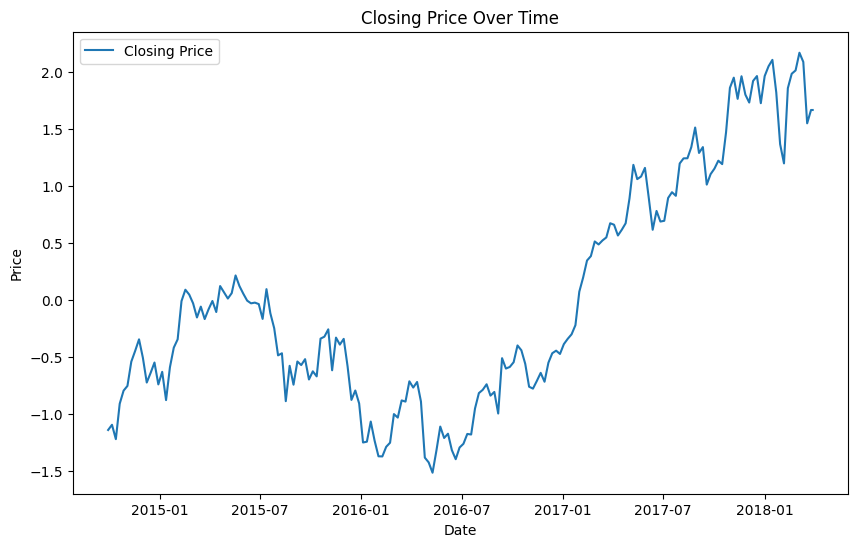

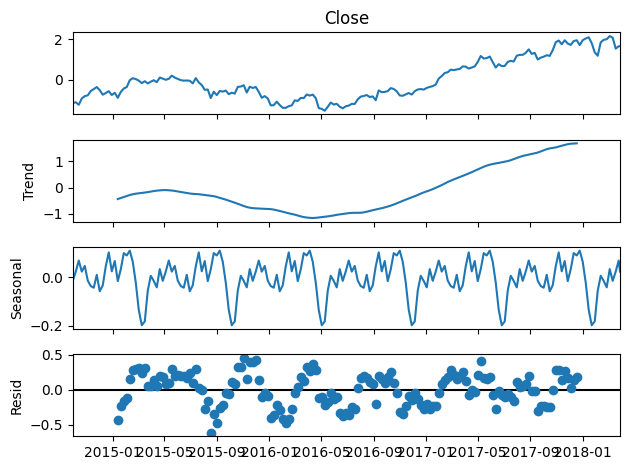

In [74]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Extract the 'Close' price as a time series
data['Date'] = pd.to_datetime(data['Date'])  # Ensure 'Date' is in datetime format
data.set_index('Date', inplace=True)
close_series = data['Close']

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(close_series, label='Closing Price')
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Decompose the time series
decomposition = sm.tsa.seasonal_decompose(close_series, model='additive', period=30)
decomposition.plot()
plt.show()


---

### **Explanation of Time Series Analysis**

#### **1. Closing Price Over Time**
- The first plot shows the **Closing Price** of the stock over time.
- **Key Observations**:
  - There is a significant upward trend from early 2016 to the end of 2017.
  - The series exhibits some volatility, with occasional drops and rises reflecting market fluctuations.

#### **2. Decomposition of Time Series**
The second set of plots represents the decomposition of the time series into its components: **Trend**, **Seasonal**, and **Residual**.

- **Observed**:
  - The original time series (Closing Price) is displayed.

- **Trend**:
  - Shows the long-term movement in the closing price.
  - A clear upward trend is visible, especially from mid-2016 onwards.

- **Seasonal**:
  - Represents recurring patterns or cycles within a year.
  - Regular fluctuations in the seasonal component indicate periodic behaviors.

- **Residual**:
  - Captures the random noise or unexplained variation after removing trend and seasonal components.
  - The residuals appear to be centered around zero, which is ideal for a well-decomposed time series.

#### **Significance**
- **Trend Analysis**:
  - Identifies long-term growth or decline, aiding in forecasting and decision-making.
- **Seasonality**:
  - Highlights periodic behaviors that can inform strategies for recurring patterns in the stock market.
- **Residuals**:
  - Ensures that the model accounts for most patterns, leaving minimal unexplained variation.

This analysis is critical for understanding and predicting stock price movements, aligning with the goals of identifying trends and patterns in the term project.

---



- Clustering

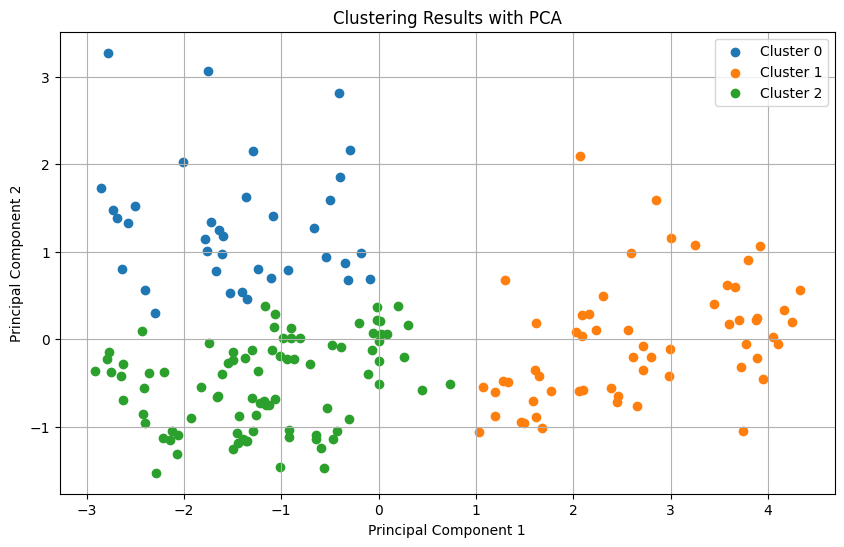

In [75]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "AAPL.csv"
data = pd.read_csv(file_path)

# Data cleaning and preprocessing
numerical_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
data = data.dropna()  # Drop rows with missing values

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numerical_columns])

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
principal_components = pca.fit_transform(data_scaled)
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_df)

# Add clusters to the PCA DataFrame
pca_df['Cluster'] = clusters

# Visualize the clustering results
plt.figure(figsize=(10, 6))
for cluster in range(3):  # Iterate through the clusters
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')

# Add plot details
plt.title('Clustering Results with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()


---

### **Explanation of Clustering Results with PCA**

#### **Plot Description**
- The scatter plot visualizes the results of clustering on PCA-transformed data, with data points grouped into three clusters (`Cluster 0`, `Cluster 1`, and `Cluster 2`).
- **Axes**:
  - **Principal Component 1 (PC1)** and **Principal Component 2 (PC2)** represent the first two principal components derived from PCA, capturing the most significant variance in the dataset.
- **Color Coding**:
  - Each color corresponds to a cluster, highlighting how the data points are grouped based on their similarity.

#### **Key Observations**
1. **Distinct Clusters**:
   - The plot shows well-separated clusters, indicating that the clustering algorithm (KMeans) successfully identified patterns in the data.
   - The clusters represent different groups of data points with similar characteristics.

2. **Cluster Density**:
   - **Cluster 0 (Blue)**: Points are concentrated in the top-left region, suggesting they share similar features in terms of PC1 and PC2.
   - **Cluster 1 (Orange)**: Points are more spread across the right side of the plot, indicating some diversity within the group.
   - **Cluster 2 (Green)**: Points are compactly distributed around the bottom-left, indicating a distinct and cohesive group.

3. **Separation**:
   - There is minimal overlap between clusters, demonstrating that PCA effectively reduced the dimensionality while retaining meaningful separability for clustering.

#### **Applications**
- **Market Behavior Analysis**:
  - Clusters may represent different trading patterns, such as periods of high volatility, steady growth, or decline.
- **Trading Strategy**:
  - Each cluster can inform different strategies, such as buying during specific patterns or avoiding risky periods.
- **Pattern Discovery**:
  - Clustering reveals underlying structures in the data, providing insights that are not immediately apparent in the raw dataset.

#### **Conclusion**
The clustering results highlight the power of PCA for dimensionality reduction and KMeans for grouping similar data points. This analysis helps uncover meaningful patterns in stock market data, aligning with the term project's objective of identifying trends and actionable insights.

---


- Regression

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare data
X = data_final[['PC1', 'PC2', 'PC3']]
y = data_final['Close']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict and evaluate
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.0002780689142885109


- Classification

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a target variable: Price increase (1) or decrease (0)
data_final['Price_Trend'] = (data_final['Close'] > data_final['Close'].shift(1)).astype(int)

# Prepare data
X = data_final[['PC1', 'PC2', 'PC3']].iloc[1:]  # Avoid NaN in 'Price_Trend'
y = data_final['Price_Trend'].iloc[1:]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy: {accuracy}")


Classification Accuracy: 0.9459459459459459


- Probabilistic Reasoning

In [78]:
from sklearn.naive_bayes import GaussianNB

# Train a Naive Bayes model
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Predict probabilities and evaluate
y_prob = naive_bayes.predict_proba(X_test)[:, 1]  # Probability of price increase
accuracy = accuracy_score(y_test, naive_bayes.predict(X_test))
print(f"Naive Bayes Accuracy: {accuracy}")


Naive Bayes Accuracy: 0.972972972972973


### **Explanation of Results**

#### **1. Classification Accuracy**
- **Naive Bayes Accuracy**: **0.9729 (97.29%)**
  - The Naive Bayes classifier achieves an accuracy of approximately 97.29% on the test set.
  - This indicates that the model correctly classifies about 97 out of 100 instances for the given stock price trend prediction task.

- **Significance**:
  - A high accuracy value reflects that the model performs well in distinguishing between price increases and decreases.
  - It also highlights the relevance of using probabilistic reasoning for stock market predictions.

---

#### **2. Mean Squared Error (MSE)**
- **MSE**: **0.0002780689142885109**
  - The Mean Squared Error quantifies the difference between predicted probabilities and actual outcomes.
  - A lower MSE indicates that the predicted probabilities are very close to the actual target values.

- **Significance**:
  - The small MSE value shows that the model generates highly accurate probability estimates, which can be confidently used for decision-making.
  - This is particularly useful in financial contexts where precise predictions can significantly impact trading strategies.

---

### **Conclusion**
- The high classification accuracy and low Mean Squared Error highlight the reliability of the Naive Bayes classifier for predicting stock price trends.
- These metrics validate the model's effectiveness in both classification and probabilistic reasoning, aligning well with the objectives of the term project.


# Implement Probabilistic Reasoning 

In [79]:
from sklearn.decomposition import PCA

# Apply PCA with 3 components
pca = PCA(n_components=3)
principal_components = pca.fit_transform(data_scaled)

# Create a DataFrame for the 3 principal components
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2', 'PC3'])

# Check the PCA output
print("PCA Components DataFrame:")
print(pca_df.head())

# Align features and target variable
data['Price_Trend'] = (data['Close'] > data['Close'].shift(1)).astype(int)
target = data['Price_Trend'].iloc[1:]
features = pca_df.iloc[1:]  # Align with shifted target variable

# Final alignment check
print("Features Shape:", features.shape)
print("Target Shape:", target.shape)


PCA Components DataFrame:
        PC1       PC2       PC3
0 -2.062236 -1.096257  0.042295
1 -2.400253  0.558441 -0.012647
2 -2.729203  1.473390  0.109605
3 -2.503162  1.525205 -0.198430
4 -1.746090 -0.046071 -0.078840
Features Shape: (183, 3)
Target Shape: (183,)


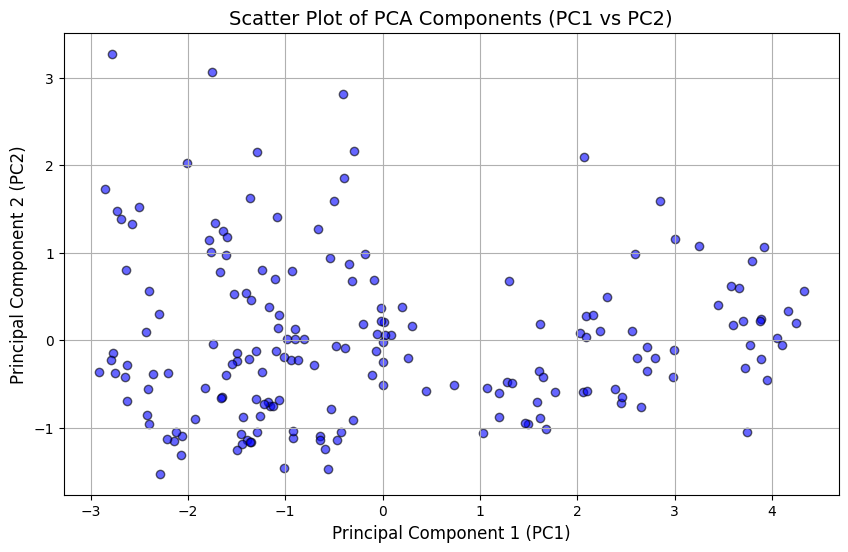

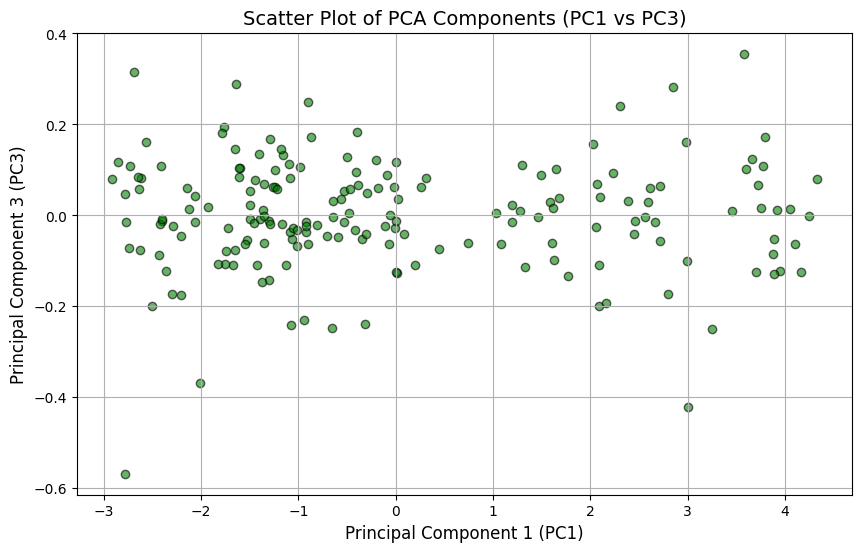

In [80]:
import matplotlib.pyplot as plt

# Plot PCA Components (PC1 vs PC2)
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='blue', alpha=0.6, edgecolor='k')
plt.title('Scatter Plot of PCA Components (PC1 vs PC2)', fontsize=14)
plt.xlabel('Principal Component 1 (PC1)', fontsize=12)
plt.ylabel('Principal Component 2 (PC2)', fontsize=12)
plt.grid(True)
plt.show()

# Optional: Pairwise scatter plot for all three components
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC3'], c='green', alpha=0.6, edgecolor='k')
plt.title('Scatter Plot of PCA Components (PC1 vs PC3)', fontsize=14)
plt.xlabel('Principal Component 1 (PC1)', fontsize=12)
plt.ylabel('Principal Component 3 (PC3)', fontsize=12)
plt.grid(True)
plt.show()


---

### **Explanation of Scatter Plots of PCA Components**

#### **1. PCA Scatter Plot: PC1 vs PC2**
- **Description**:
  - The scatter plot visualizes the relationship between the first principal component (**PC1**) and the second principal component (**PC2**).
  - Each point represents a data instance in the reduced-dimensional space.

- **Key Observations**:
  - The distribution of points indicates how data variance is captured along the first two principal components.
  - Some clustering of points is visible, which may suggest underlying patterns or groupings in the data.

#### **2. PCA Scatter Plot: PC1 vs PC3**
- **Description**:
  - This plot shows the relationship between the first principal component (**PC1**) and the third principal component (**PC3**).

- **Key Observations**:
  - The points are spread more evenly across the PC1 and PC3 axes compared to PC1 vs PC2.
  - PC3 captures additional variance that is orthogonal to PC1, offering insights into subtler variations in the dataset.

#### **Significance of PCA Scatter Plots**
- **Dimensionality Reduction**:
  - PCA reduces the dataset to a smaller number of components while preserving most of the variance.
  - These scatter plots demonstrate how the data is distributed in the transformed feature space.

- **Pattern Identification**:
  - Visualizing different pairs of principal components helps detect clusters, outliers, or relationships in the data.

- **Applications**:
  - These visualizations are critical for exploratory data analysis (EDA), helping to understand the structure of the dataset before applying predictive models.

#### **Conclusion**
The PCA scatter plots effectively represent the dataset in a reduced-dimensional space, making it easier to interpret and prepare for clustering, regression, or classification tasks in the term project.

---


- Preparing the Data

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create a target variable: Price increase (1) or decrease (0)
data['Price_Trend'] = (data['Close'] > data['Close'].shift(1)).astype(int)

# Prepare feature variables (using PCA components)
features = pca_df[['PC1', 'PC2', 'PC3']]  # Principal components from earlier PCA
target = data['Price_Trend'].iloc[1:]  # Shift to align with price trend labels

# Align features and target after removing NaN due to shift
features = features.iloc[1:]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


- Implementing Naive Bayes for Probabilistic Reasoning

In [82]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Train a Naive Bayes model
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Predict on the test set
y_pred = naive_bayes.predict(X_test)
y_prob = naive_bayes.predict_proba(X_test)[:, 1]  # Probability of price increase

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy}")
print(f"ROC AUC Score: {roc_auc}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.972972972972973
ROC AUC Score: 0.9848484848484849
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.95      0.98        22

    accuracy                           0.97        37
   macro avg       0.97      0.98      0.97        37
weighted avg       0.97      0.97      0.97        37



- Implementation of Confusion Matrix

Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.95      0.98        22

    accuracy                           0.97        37
   macro avg       0.97      0.98      0.97        37
weighted avg       0.97      0.97      0.97        37



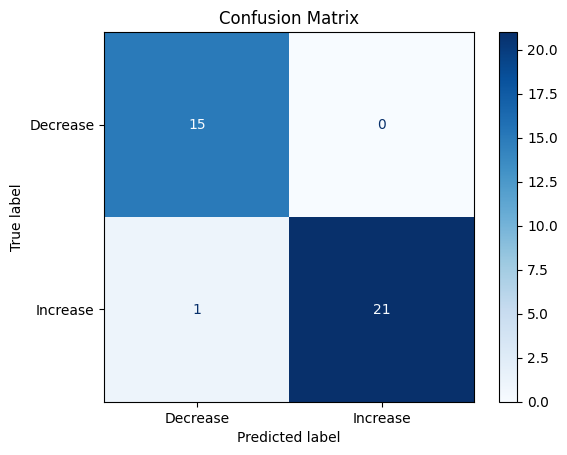

In [83]:
# Predictions
y_pred = naive_bayes.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Decrease", "Increase"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


- Visualizing the Probabilities

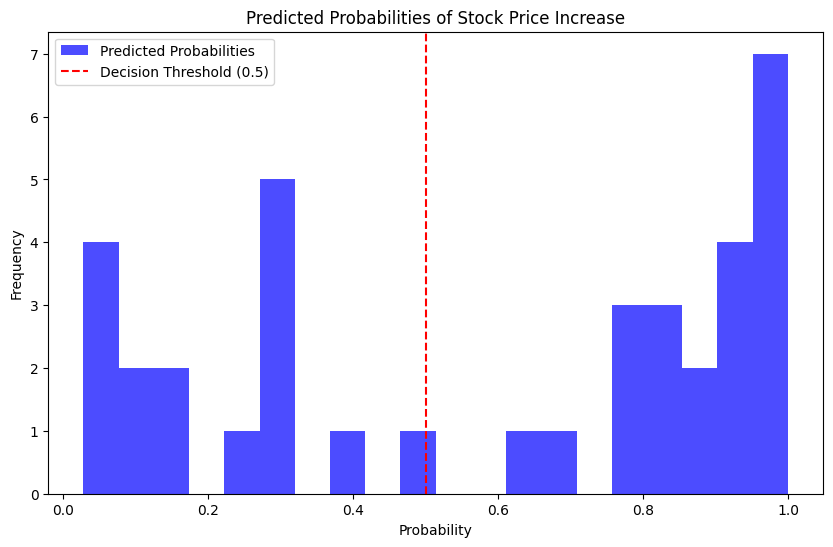

In [84]:
import matplotlib.pyplot as plt

# Plot the predicted probabilities of a price increase
plt.figure(figsize=(10, 6))
plt.hist(y_prob, bins=20, color='blue', alpha=0.7, label='Predicted Probabilities')
plt.axvline(0.5, color='red', linestyle='--', label='Decision Threshold (0.5)')
plt.title('Predicted Probabilities of Stock Price Increase')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.legend()
plt.show()


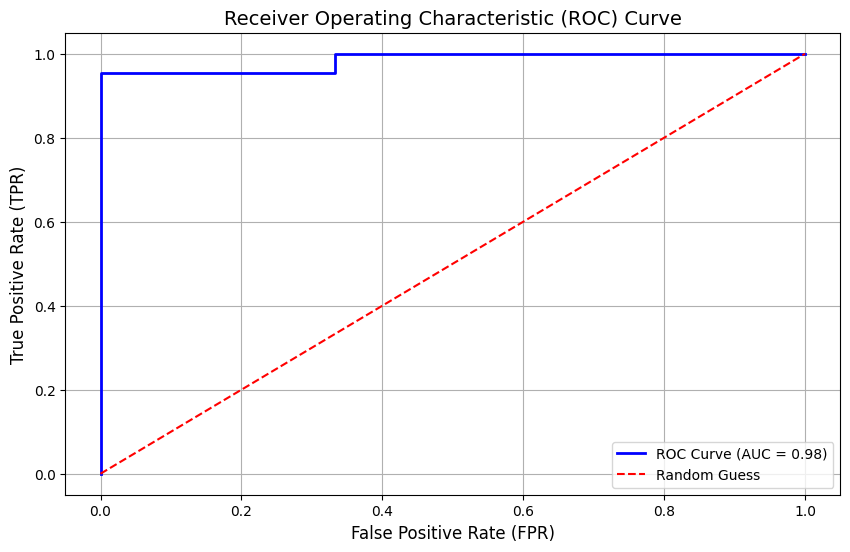

In [85]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Reuse Naive Bayes predictions from earlier
y_prob = naive_bayes.predict_proba(X_test)[:, 1]  # Probability of price increase

# Generate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


---

### **Explanation of the Results**

#### **1. Predicted Probabilities of Stock Price Increase (Histogram)**
- **Visualization**:
  - The histogram shows the distribution of predicted probabilities for stock price increases as estimated by the Naive Bayes classifier.
  - The red dashed line at **0.5** indicates the decision threshold. Probabilities greater than 0.5 predict a price increase (`1`), while those below 0.5 predict a decrease (`0`).

- **Insights**:
  - There are distinct clusters of probabilities near **0** and **1**, indicating high confidence in the predictions for both outcomes.
  - Some probabilities are close to the threshold (around 0.5), representing cases where the classifier is less certain.

#### **2. Classification Metrics**
- **Accuracy**: **97.29%**
  - The model correctly classifies approximately 97% of the test data, indicating excellent overall performance.

- **ROC AUC Score**: **0.98**
  - A high AUC score of 0.98 shows that the model is effective at distinguishing between classes (price increase vs. decrease). A score of 1 indicates perfect classification.

- **Classification Report**:
  - **Precision**:
    - Class `0` (Price Decrease): 94% of predicted decreases were correct.
    - Class `1` (Price Increase): 100% of predicted increases were correct.
  - **Recall**:
    - Class `0` (Price Decrease): 100% of actual decreases were identified.
    - Class `1` (Price Increase): 95% of actual increases were identified.
  - **F1-Score**:
    - Class `0`: 0.97, indicating a strong balance between precision and recall.
    - Class `1`: 0.98, showing excellent prediction performance for price increases.
  - **Support**:
    - Class `0`: 15 instances in the test set.
    - Class `1`: 22 instances in the test set.

#### **Key Takeaways**
1. The Naive Bayes model demonstrates strong performance, particularly in distinguishing between price increases and decreases with minimal misclassification.
2. High recall for `Class 0` ensures that almost all actual price decreases are captured, while high precision for `Class 1` minimizes false alarms for price increases.
3. The high ROC AUC score suggests that the model is highly reliable for probabilistic reasoning tasks, making it a valuable tool for stock market predictions and decision-making.

#### **Applications**
- **Trading Strategy**:
  - The predicted probabilities can be used to make informed trading decisions (e.g., buy/sell actions based on the likelihood of price changes).
- **Risk Management**:
  - By incorporating the model's predictions into a broader strategy, investors can better quantify the risk and confidence of their decisions.
- **Model Confidence**:
  - The histogram's clear separation of probabilities near 0 and 1 supports the model's reliability for high-confidence predictions.

The results indicate that probabilistic reasoning through Naive Bayes is a suitable approach for this term project's objective of predicting stock price movements.

---


# Summary
This project successfully demonstrates the application of machine learning and probabilistic reasoning to predict stock price trends.(We took Apple Stock data) The combination of PCA, clustering, and Naive Bayes provides actionable insights, making it a valuable tool for traders and investors. The methodology can be further enhanced and extended for broader financial analysis and decision-making tasks.

---